# 🏪🛒 MARKET SALES 🛒🏪

## ✅ INFORMATION

💠[kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

💠 **Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

💠 **Attribute information**

**Invoice id:** Computer generated sales slip invoice identification number     
**Branch:** Branch of supercenter (3 branches are available identified by A, B and C).      
**City:** Location of supercenters      
**Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.       
**Gender:** Gender type of customer     
**Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel        
**Unit price:** Price of each product in $      
**Quantity:** Number of products purchased by customer      
**Tax:** 5% tax fee for customer buying     
**Total:** Total price including tax (TARGET)       
**Date:** Date of purchase (Record available from January 2019 to March 2019)       
**Time:** Purchase time (10am to 9pm)       
**Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)        
**COGS:** Cost of goods sold        
**Gross margin percentage:** Gross margin percentage        
**Gross income:** Gross income      
**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)     

💠 **Problem:** Supermarket owners want to predict the prices of goods and merchandise in order to know which branches make more profits and which ones should be developed in order to determine more profit.

💠 **Solving the problem:** With the development we are witnessing from artificial intelligence, machine learning models can be used and then trained on a set of training data, then tested on a set of test data, and predicts prices and incomes based on the data to be entered.

## ✅ Import Libraries

In [1]:
# basic import
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# others
import warnings
warnings.filterwarnings('ignore')


## ✅ Load dataset

In [2]:
df = pd.read_csv("../../0.dataset/supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## ✅ Exploratory Data Analysis

### 💠Show information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

❇️ Insights:

* No missing data present
* The data type of the "date" field is not correctly assigned.
* The data type of the "time" field is not correctly assigned.

🔸Solving issues encountered

In [4]:
# correct the data type
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [5]:
# change name of the columns
for col in df.columns:
    df.rename(columns={col: col.lower().replace(' ', '_')}, inplace=True)
    
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [6]:
# drop unnecessary column
df.drop(["invoice_id"], axis=1, inplace=True) 
df.drop(["gross_margin_percentage"], axis=1, inplace=True) 

### 💠Show statistical summary

In [7]:
# Numerical
df.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


❇️ Insights:

* gross_margin_percentage has no variation, which means that it would have no contribution to the model.

In [8]:
# Categorical
df.describe(include=[object])

,branch,city,customer_type,gender,product_line,time,payment
count,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,2,6,506,3
top,A,Yangon,Member,Female,Fashion accessories,19:48:00,Ewallet
freq,340,340,501,501,178,7,345


❇️ Insights:

* It can be seen that the majority of customers belong to branch A.
* It can be seen that the majority of customers belong to City Yangon.
* It is observed that customers prefer Fashion accessories.
* Most of our customers make their payments through Ewallet.

### 💠Univariate Analysis

#### 🔹Show Distribution of Categorical Data

In [9]:
# define numerical and categorical features
num_features = list(df.select_dtypes(exclude=[object]).columns)
#num_features.remove("date")
cat_features = list(df.select_dtypes(include=[object]).columns)
cat_features.remove("time")
print(f"There are {len(num_features)} numerical features: {num_features}")
print(f"There are {len(cat_features)} categorical features: {cat_features}")

There are 8 numerical features: ['unit_price', 'quantity', 'tax_5%', 'total', 'date', 'cogs', 'gross_income', 'rating']
There are 6 categorical features: ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment']


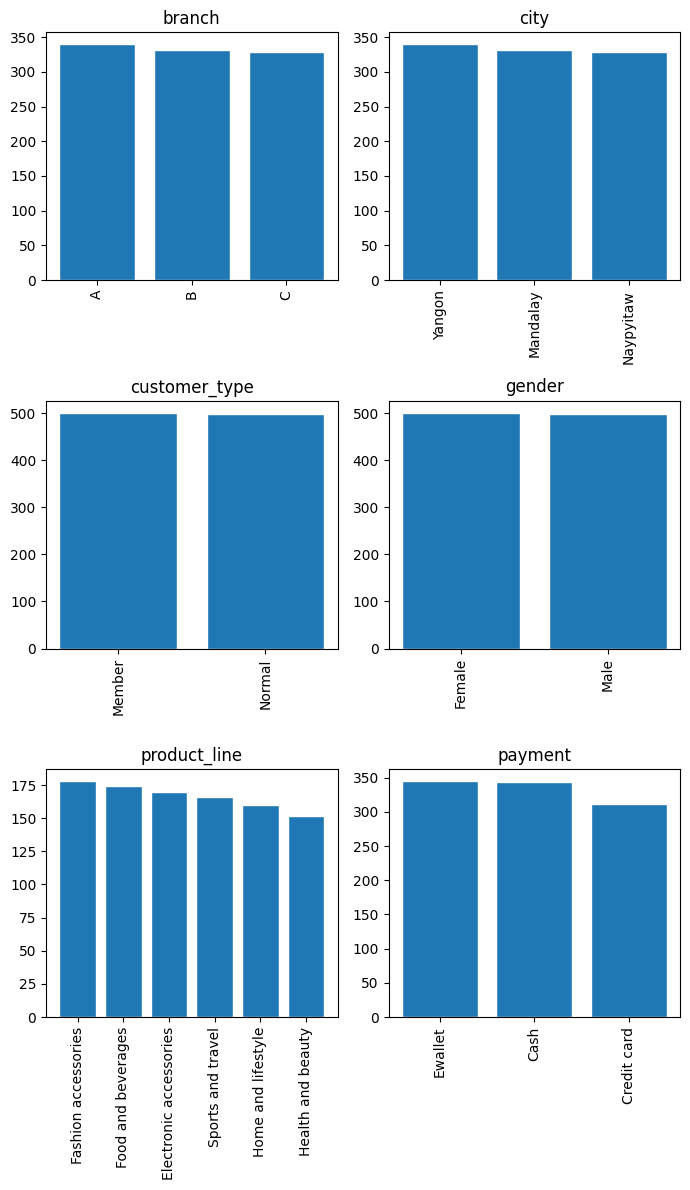

In [10]:
columnas = cat_features

# Calcular el número de filas y columnas en la disposición de subplots
num_filas = 3
num_columnas = 2

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(7, 12))

# Aplanar los subplots en un arreglo unidimensional
axs = axs.flatten()

# Iterar sobre las columnas y graficar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas):
    if df[columna].dtype == 'object':
        # Si es una columna categórica, contar las ocurrencias de cada categoría
        counts = df[columna].value_counts()
        axs[i].bar(counts.index, counts.values, edgecolor='white')
        axs[i].set_title(columna)
    else:
        # Si es una columna numérica, graficar el histograma
        axs[i].hist(df[columna], edgecolor='white')
        axs[i].set_title(columna)
    axs[i].tick_params(axis='x', rotation=90)
# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura con los histogramas
plt.show()

❇️ Insights:

* In Product line we can see that the "Fashion accessories" is the most preferred by the customers and "Health and beauty" products is the less preferred by the customers.
* Most of the customers prefer to use Ewallet and cash than Credit Card.

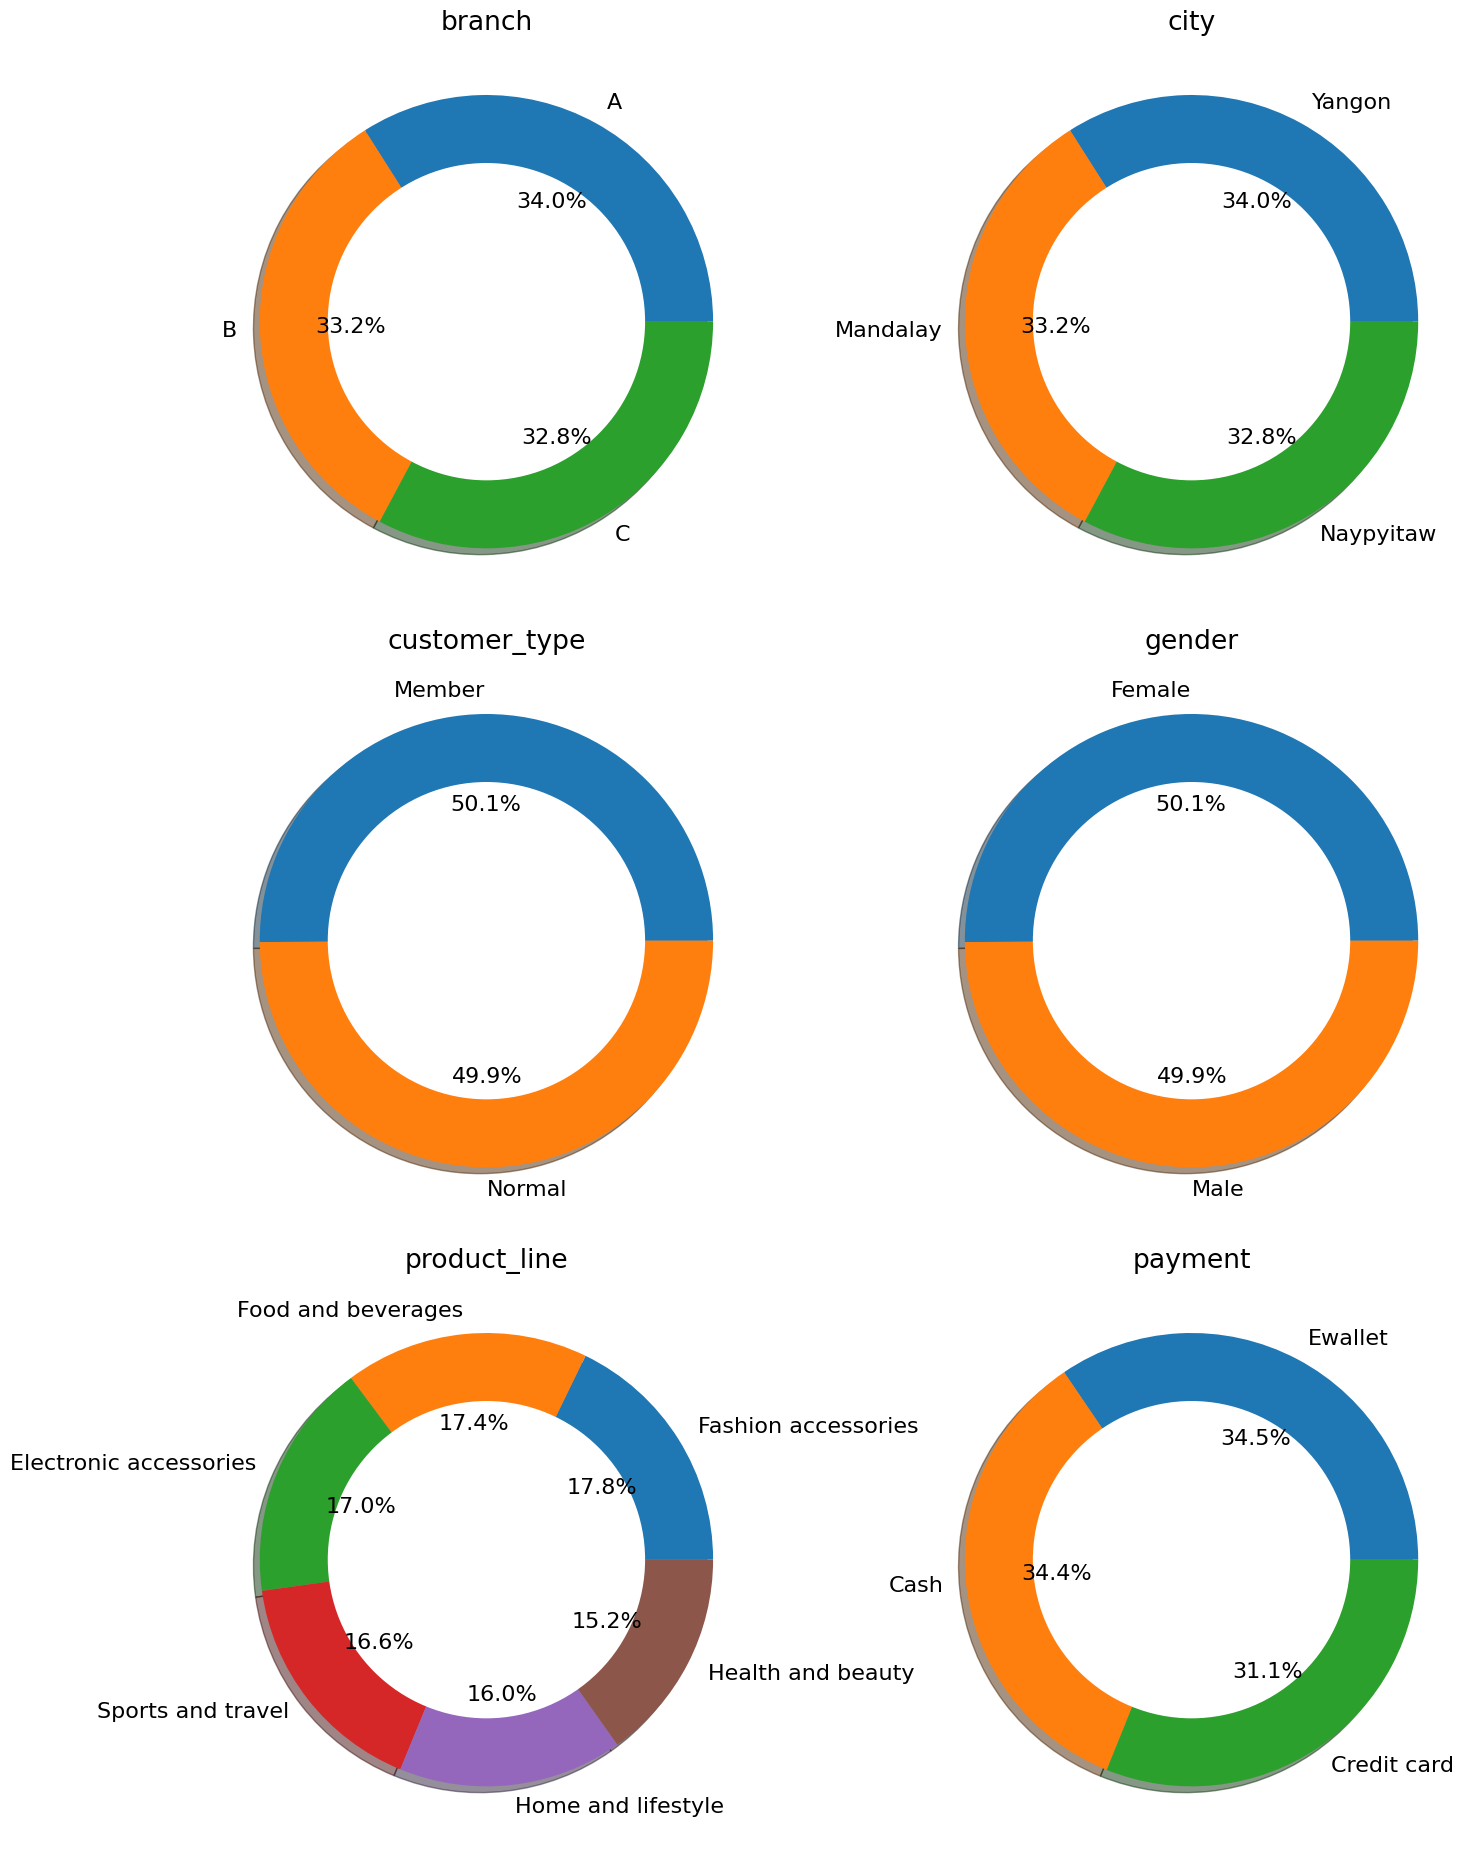

In [11]:
cat_vars = cat_features

plt.figure(figsize=(15,25))

# Configurar el tamaño de fuente de los valores en la gráfica
plt.rcParams.update({'font.size': 16})
# Crear un gráfico de barras para cada columna categórica
#plt.figure(figsize=(15, 25))
for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    df[var].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.ylabel('')
    plt.title(var)

plt.tight_layout()
plt.show()

#### 🔹Show Distribution of Numerical Data

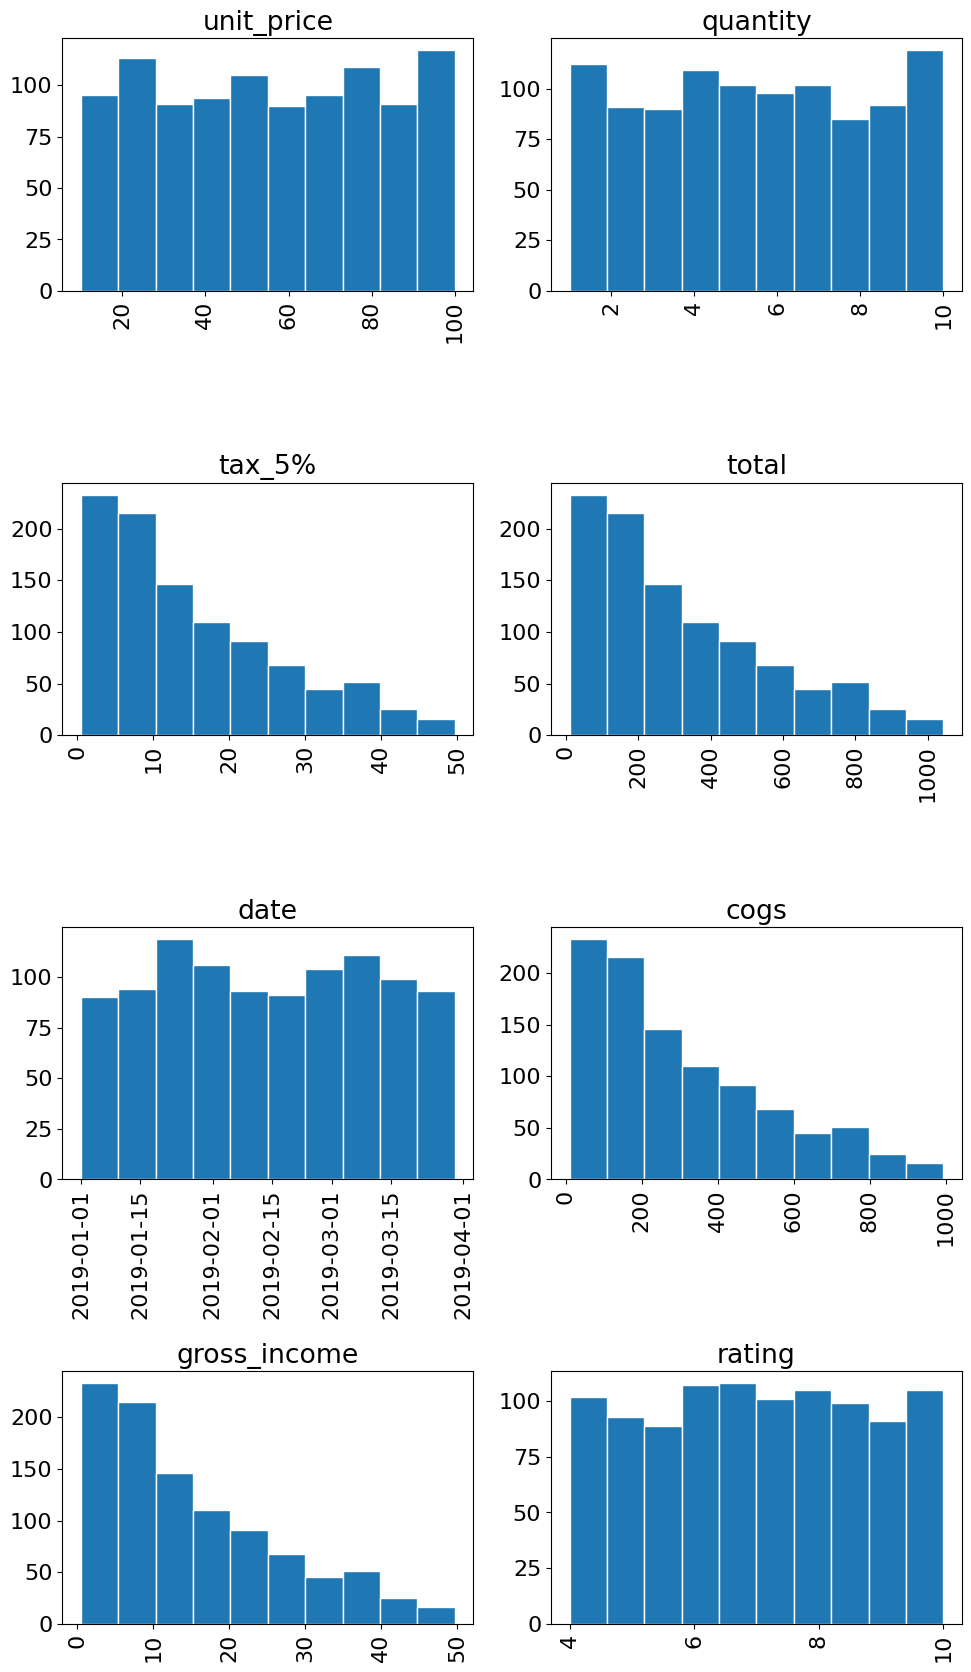

In [12]:
num_cols = num_features #.remove("date")

# Calcular el número de subplots necesarios en función del número de columnas numéricas:
num_plots = len(num_cols)
num_rows = int(num_plots / 2) + (num_plots % 2)

# Configurar la figura y los ejes de subplots:
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 17))

# Aplanar los subplots en un arreglo unidimensional:
axs = axs.flatten()

# Iterar a través de cada columna numérica y crear un histograma en el subplot correspondiente:
for i, col in enumerate(num_cols):
    axs[i].hist(df[col], edgecolor='white')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots y mostrar la figura con los histogramas:
plt.tight_layout()
plt.show()

❇️ Insights:

* 

In [13]:
# Función para visualizar la distribucion de los datos y estadisticos
def show_distribution(var_data, colname):
    #from matplotlib import pyplot as plt

    # Obtener estadísticas
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    std_val = var_data.std()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nStd:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            std_val,
                                                                                            max_val
                                                                                            ))

    # Crear un figura para 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plotear el histograma 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotear el boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Agregar título 
    fig.suptitle(f'{colname} Distribution')

    # Mostrar la figura
    fig.show()

Minimum:10.68
Mean:322.97
Median:253.85
Mode:87.23
Std:245.89
Maximum:1042.65



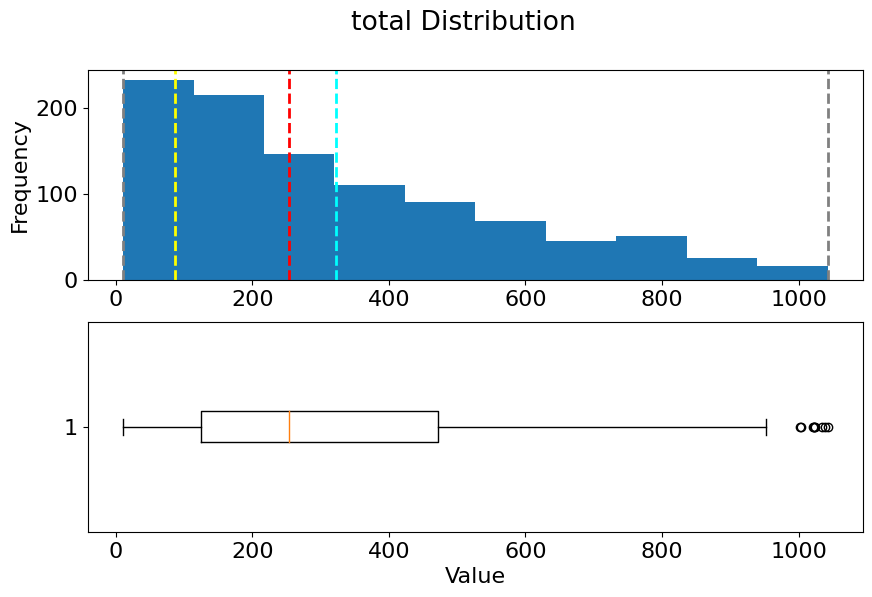

In [89]:
# Target: Total price including tax
show_distribution(df['total'],'total')

Minimum:10.08
Mean:55.67
Median:55.23
Mode:83.77
Std:26.49
Maximum:99.96



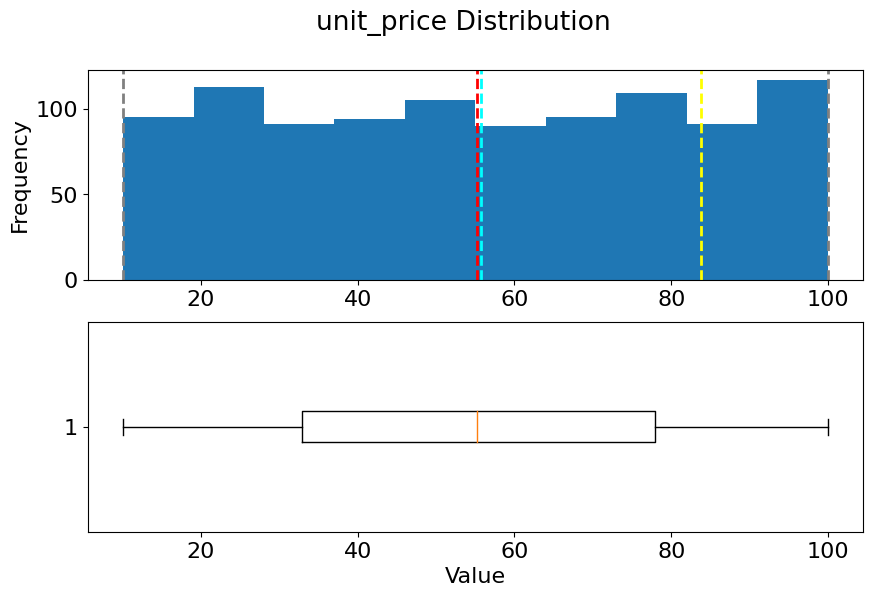

In [91]:
#  Unit Price of each product
show_distribution(df['unit_price'],'unit_price')

Minimum:1.00
Mean:5.51
Median:5.00
Mode:10.00
Std:2.92
Maximum:10.00



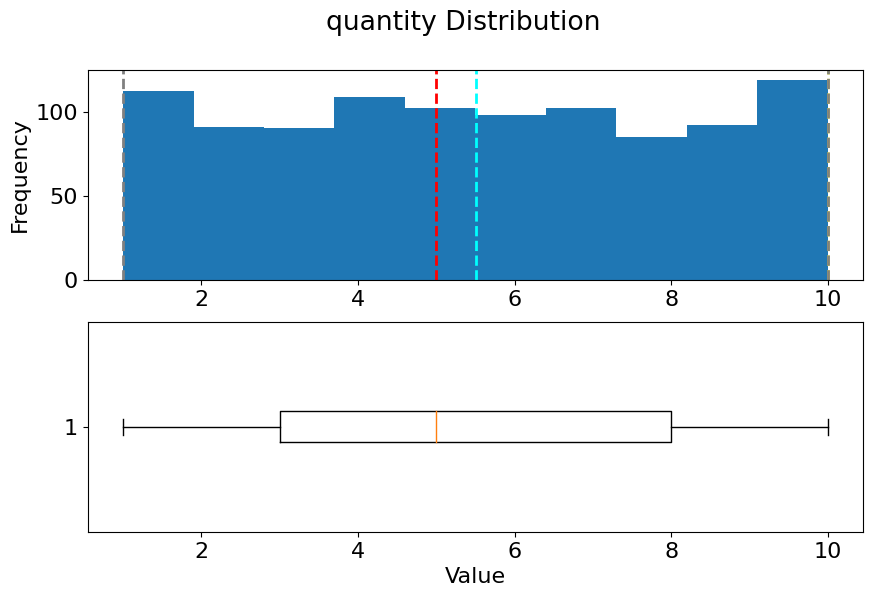

In [90]:
# Number of products purchased by the customer
show_distribution(df['quantity'],'quantity')

Minimum:0.51
Mean:15.38
Median:12.09
Mode:4.15
Std:11.71
Maximum:49.65



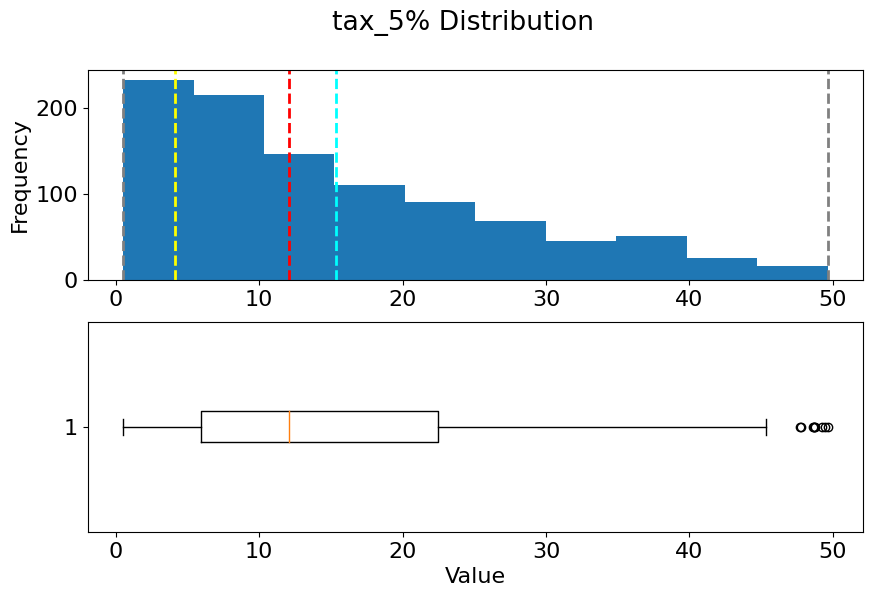

In [92]:
# 5% Tax fee
show_distribution(df['tax_5%'],'tax_5%')

Minimum:10.17
Mean:307.59
Median:241.76
Mode:83.08
Std:234.18
Maximum:993.00



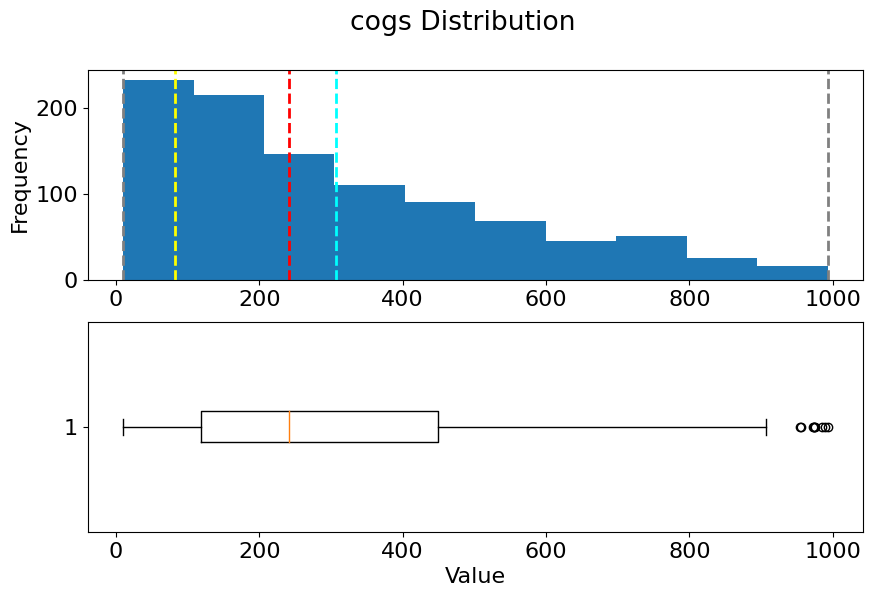

In [93]:
# Cost of goods sold
show_distribution(df['cogs'],'cogs')

Minimum:0.51
Mean:15.38
Median:12.09
Mode:4.15
Std:11.71
Maximum:49.65



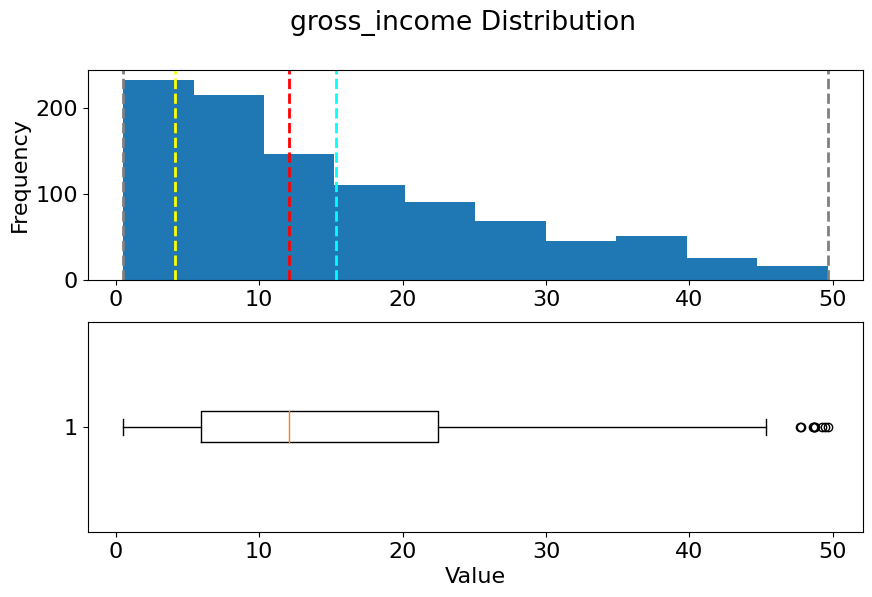

In [94]:
show_distribution(df['gross_income'],'gross_income')

Minimum:4.00
Mean:6.97
Median:7.00
Mode:6.00
Std:1.72
Maximum:10.00



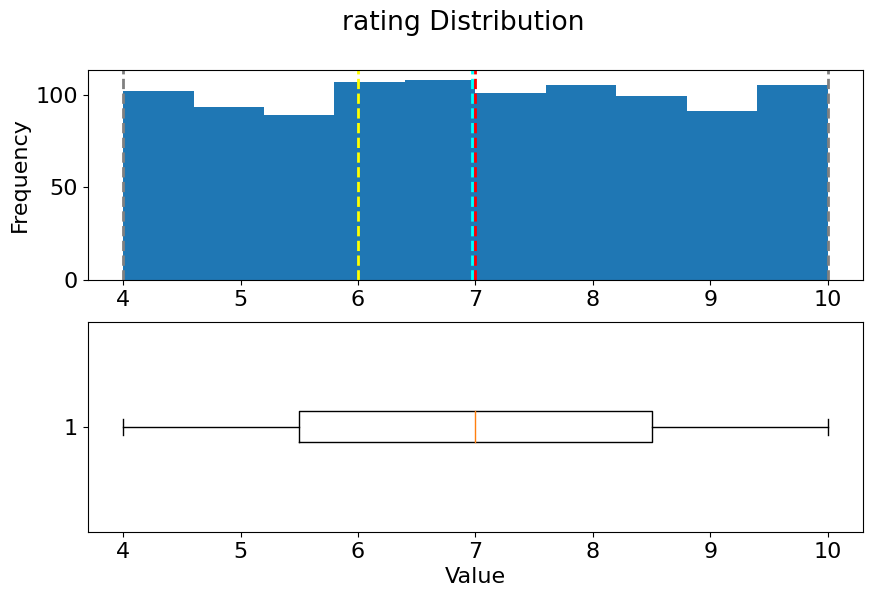

In [95]:
show_distribution(df['rating'],'rating')


### 💠Bivariate analysis 

#### 🔹Time Series Analysis

In [14]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [16]:
df_comp = df.copy()

# Convierto las columnas a tipo object
df_comp["date"] = df_comp["date"].astype(str)
df_comp["time"] = df_comp["time"].astype(str)
# Combino las columnas usando el operador +
df_comp["datetime"] = df_comp["date"] + " " + df_comp["time"]
# Convierto la columna combinada a tipo datetime
df_comp["datetime"] = pd.to_datetime(df_comp["datetime"])
df_comp.drop(["date","time"],axis=1)

df_comp.datetime = pd.to_datetime(df_comp.datetime, dayfirst=True)
df_comp.set_index("datetime", inplace=True)
df_comp = df_comp[~df_comp.index.duplicated()]
# Ordeno el índice de forma creciente usando el método sort_index
df_comp.sort_index(inplace=True)
df_comp = df_comp.asfreq(freq='H', method='ffill')
df_comp = df_comp.fillna(method='ffill')
df_comp


,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
datetime,,,,,,,,,,,,,,,
2019-01-01 10:39:00,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39:00,Credit card,435.66,21.783,6.9
2019-01-01 11:39:00,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36:00,Credit card,846.30,42.315,9.0
2019-01-01 12:39:00,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43:00,Cash,125.74,6.287,5.0
2019-01-01 13:39:00,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43:00,Cash,125.74,6.287,5.0
2019-01-01 14:39:00,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55:00,Cash,591.66,29.583,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30 15:39:00,C,Naypyitaw,Normal,Male,Health and beauty,70.21,6,21.063,442.323,2019-03-30,14:58:00,Cash,421.26,21.063,7.4
2019-03-30 16:39:00,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34:00,Cash,186.80,9.340,5.5
2019-03-30 17:39:00,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,2019-03-30,17:04:00,Cash,322.20,16.110,6.6


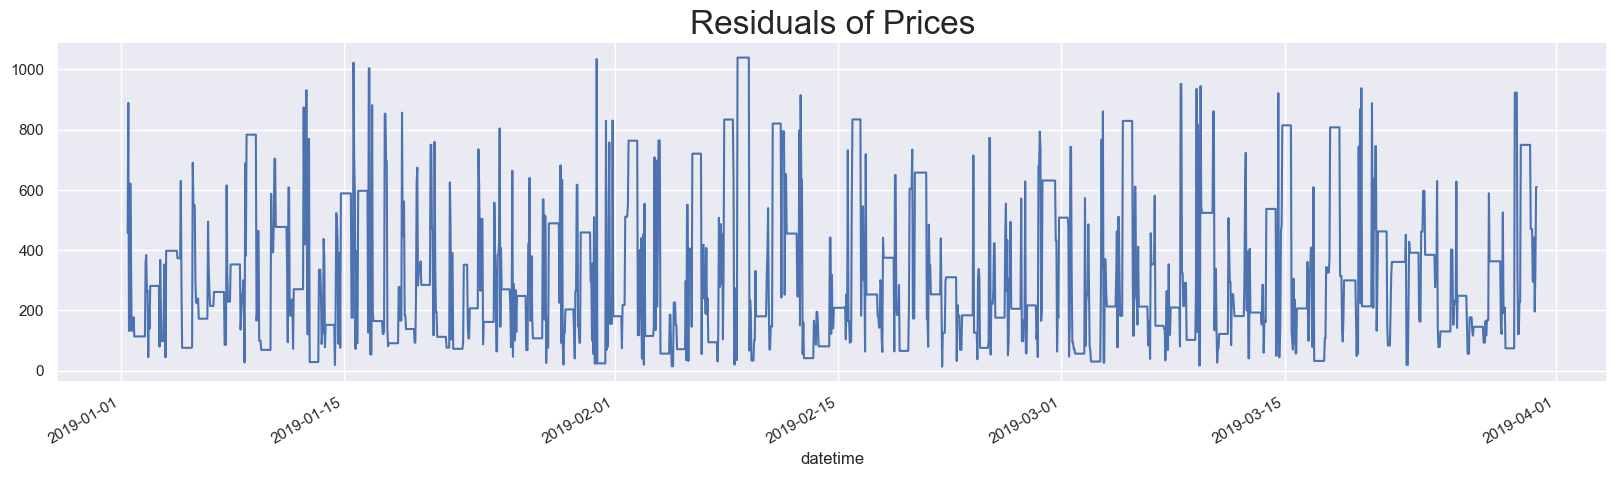

In [17]:
df_comp.total[:].plot(figsize=(20,5))
plt.title("Residuals of Prices", size=24)
plt.show()

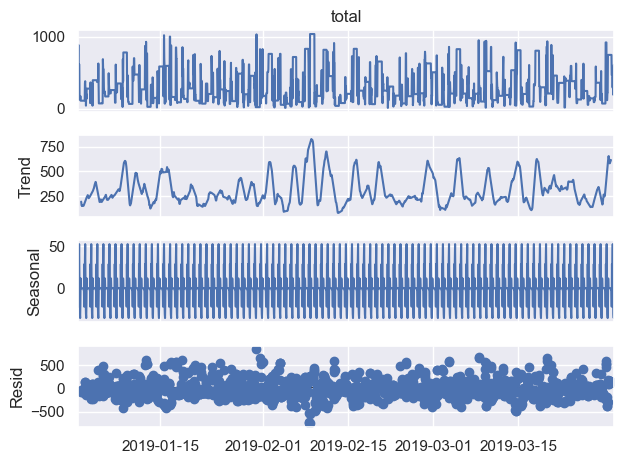

In [22]:
import statsmodels.api as sm

# Descompongo la serie temporal usando el método seasonal_decompose
result = sm.tsa.seasonal_decompose(df_comp["total"], model="additive")
# Ploteo el resultado
result.plot();

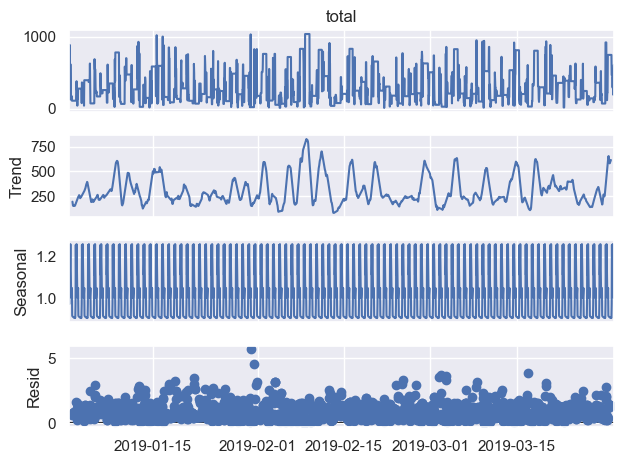

In [23]:
# Descompongo la serie temporal usando el método seasonal_decompose
result = sm.tsa.seasonal_decompose(df_comp["total"], model="multiplicative")
# Ploteo el resultado
result.plot();

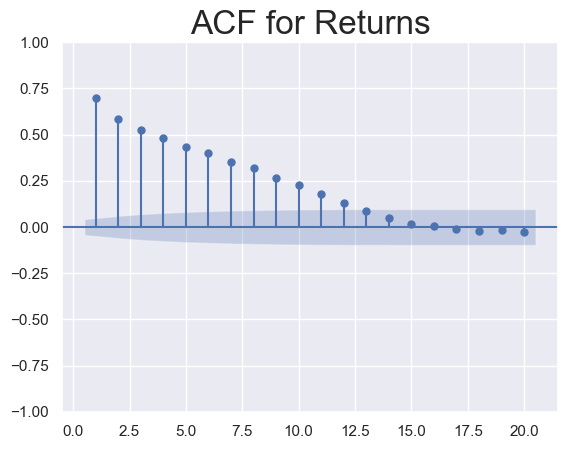

In [24]:
fig, ax = plt.subplots()
sgt.plot_acf(df_comp.total[:], zero=False, lags=20, ax=ax)
plt.title("ACF for Total", size=24)
#ax.set_ylim(-0.1, 0.1)
plt.show()

In [60]:
# Calculando el retorno
df_comp["returns"] = df_comp.total.pct_change(1)*100

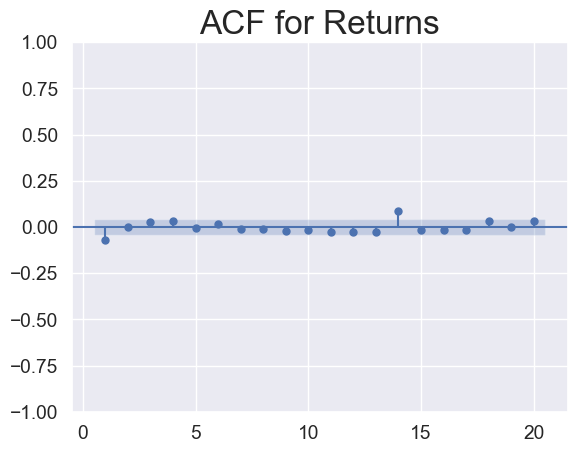

In [61]:
fig, ax = plt.subplots()
sgt.plot_acf(df_comp.returns[1:], zero=False, lags=20, ax=ax)
plt.title("ACF for Returns", size=24)
#ax.set_ylim(-0.1, 0.1)
plt.show()

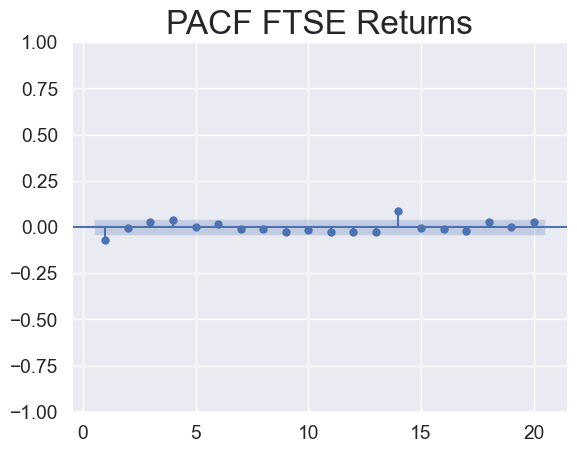

In [62]:
fig, ax = plt.subplots()
sgt.plot_pacf(df_comp.returns[1:], zero=False, lags=20, method=("ols"),ax=ax)
plt.title("PACF FTSE Returns", size=24)
#ax.set_ylim(-0.1, 0.1)
plt.show()

#### 🔹Total vs branch

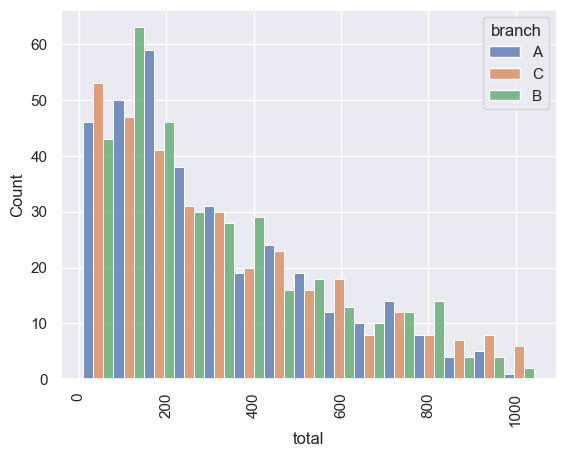

In [33]:
axs=sns.histplot(df, x='total',hue = 'branch',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* Se observa que el precio de los bienes y las mercancias de la sucursal B seguido de la sucursal A se encuentra por debajo de los 200$.
* La sucursal C el precio de sus bienes y las mercancias alcanza los $1000.

<Axes: title={'center': 'total'}, xlabel='city'>

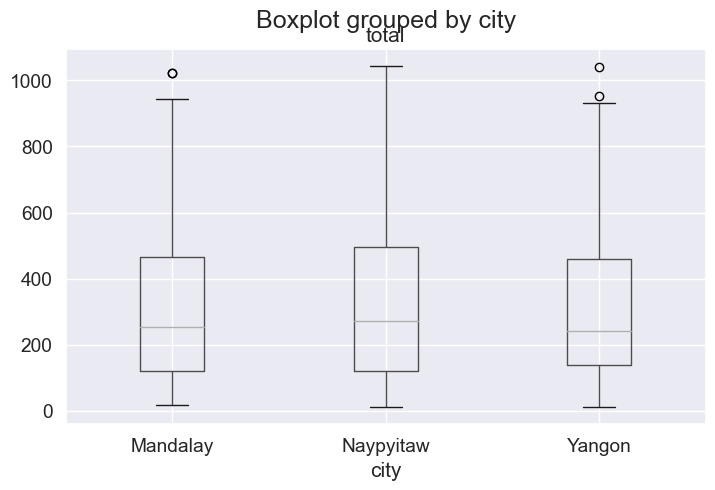

In [44]:
# Age vs gender
df.boxplot(column='total', by='city', figsize=(8,5))

<Axes: title={'center': 'total'}, xlabel='customer_type'>

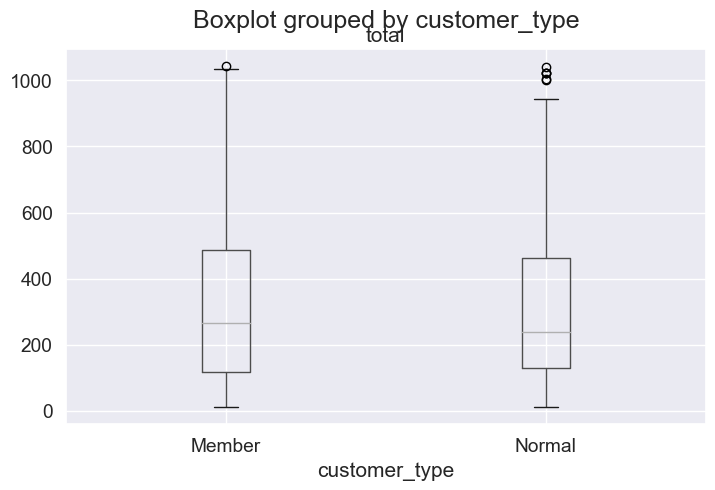

In [45]:
# Age vs gender
df.boxplot(column='total', by='customer_type', figsize=(8,5))

<Axes: title={'center': 'total'}, xlabel='gender'>

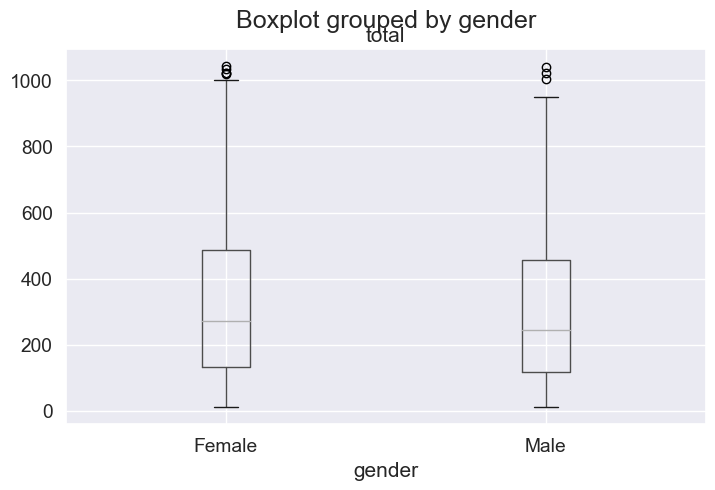

In [46]:

df.boxplot(column='total', by='gender', figsize=(8,5))

<Axes: title={'center': 'total'}, xlabel='payment'>

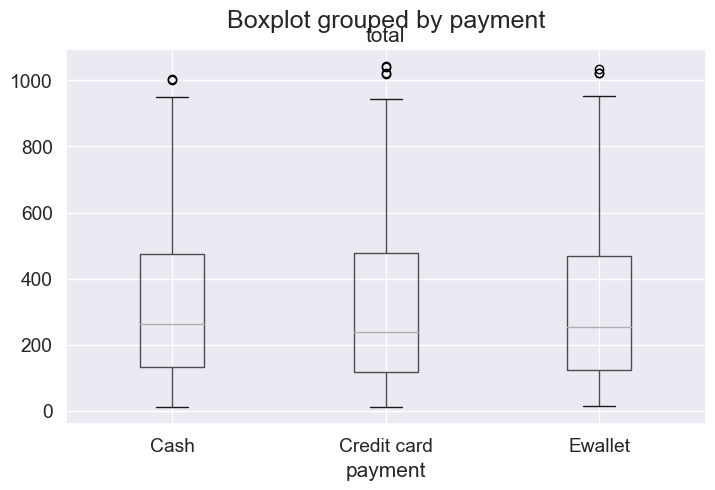

In [47]:
df.boxplot(column='total', by='payment', figsize=(8,5))

In [63]:
df.columns

Index(['branch', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'total', 'payment', 'cogs',
       'gross_income', 'rating'],
      dtype='object')

<Axes: xlabel='payment', ylabel='total'>

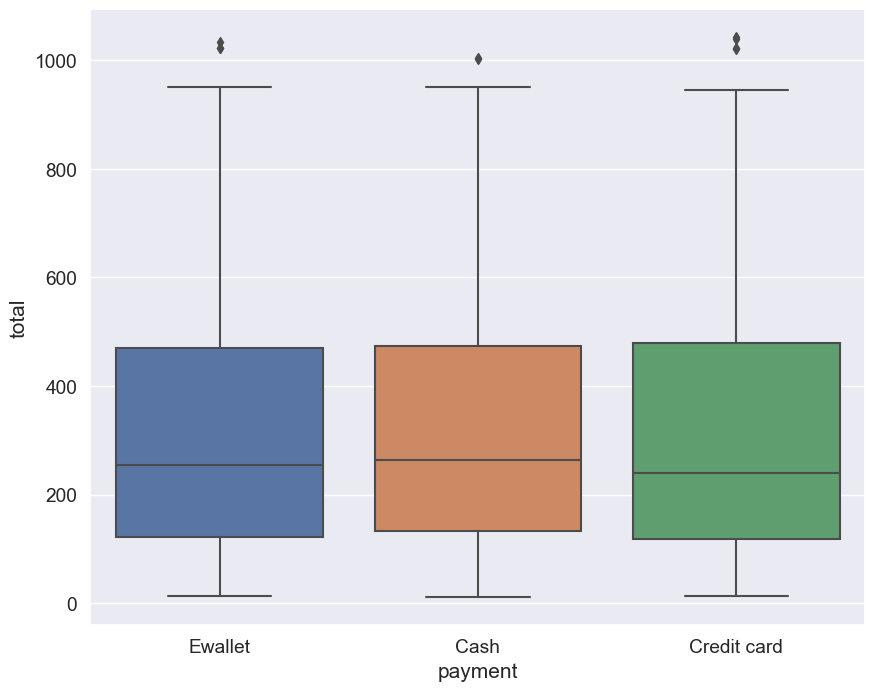

In [64]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x= "payment", y = "total")

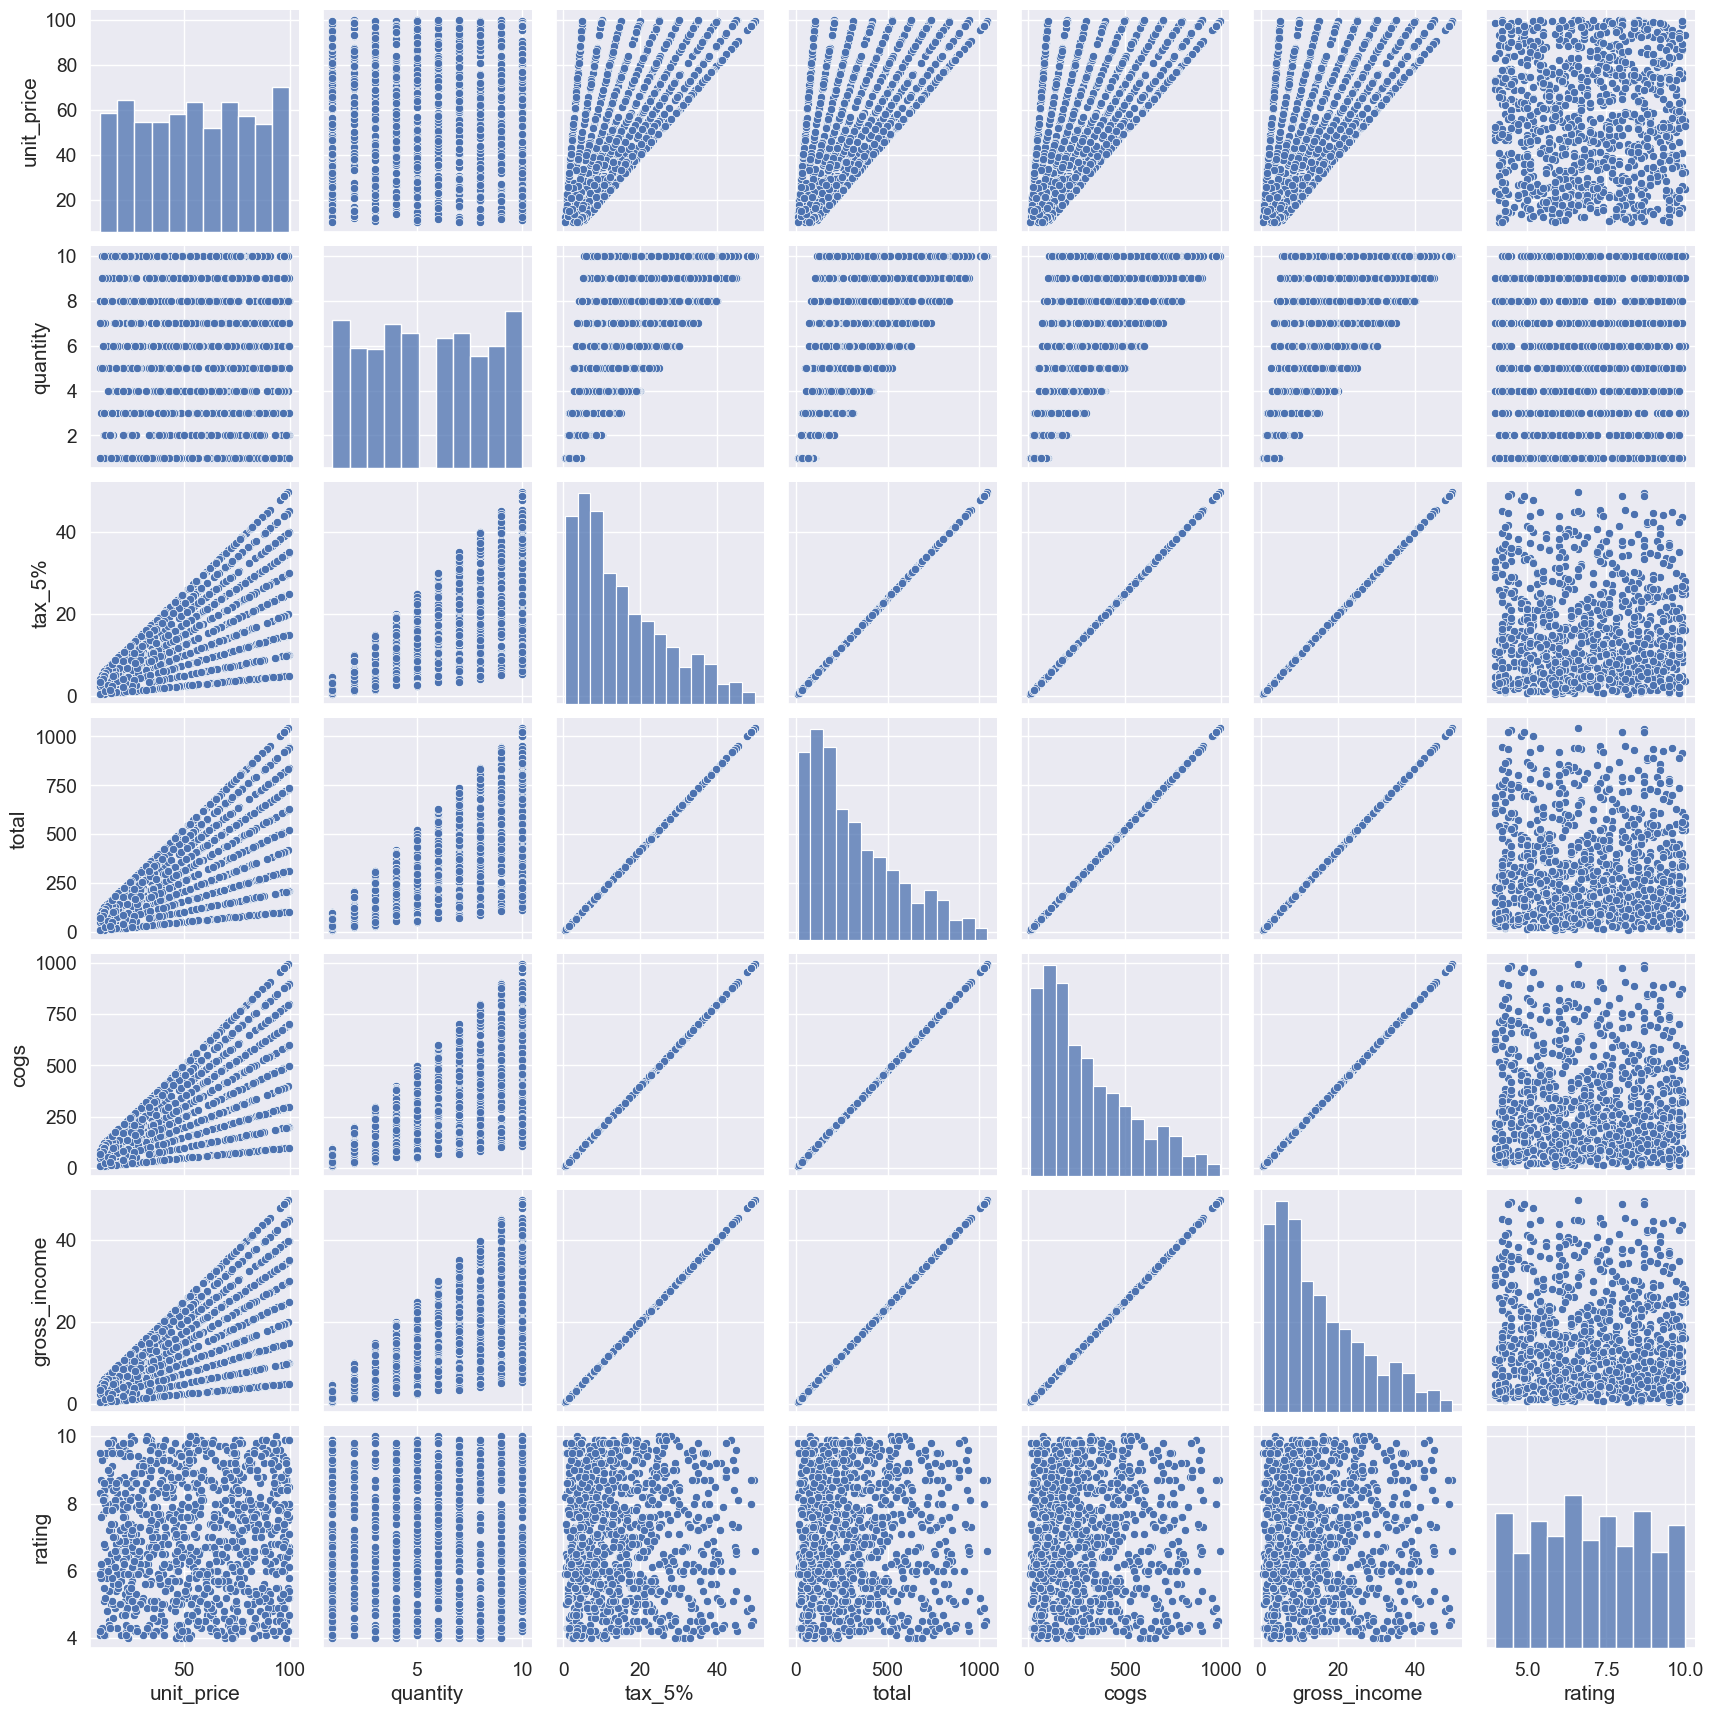

In [49]:
# create a scatter plot matrix of the dataframe
sns.pairplot(df, kind='scatter')

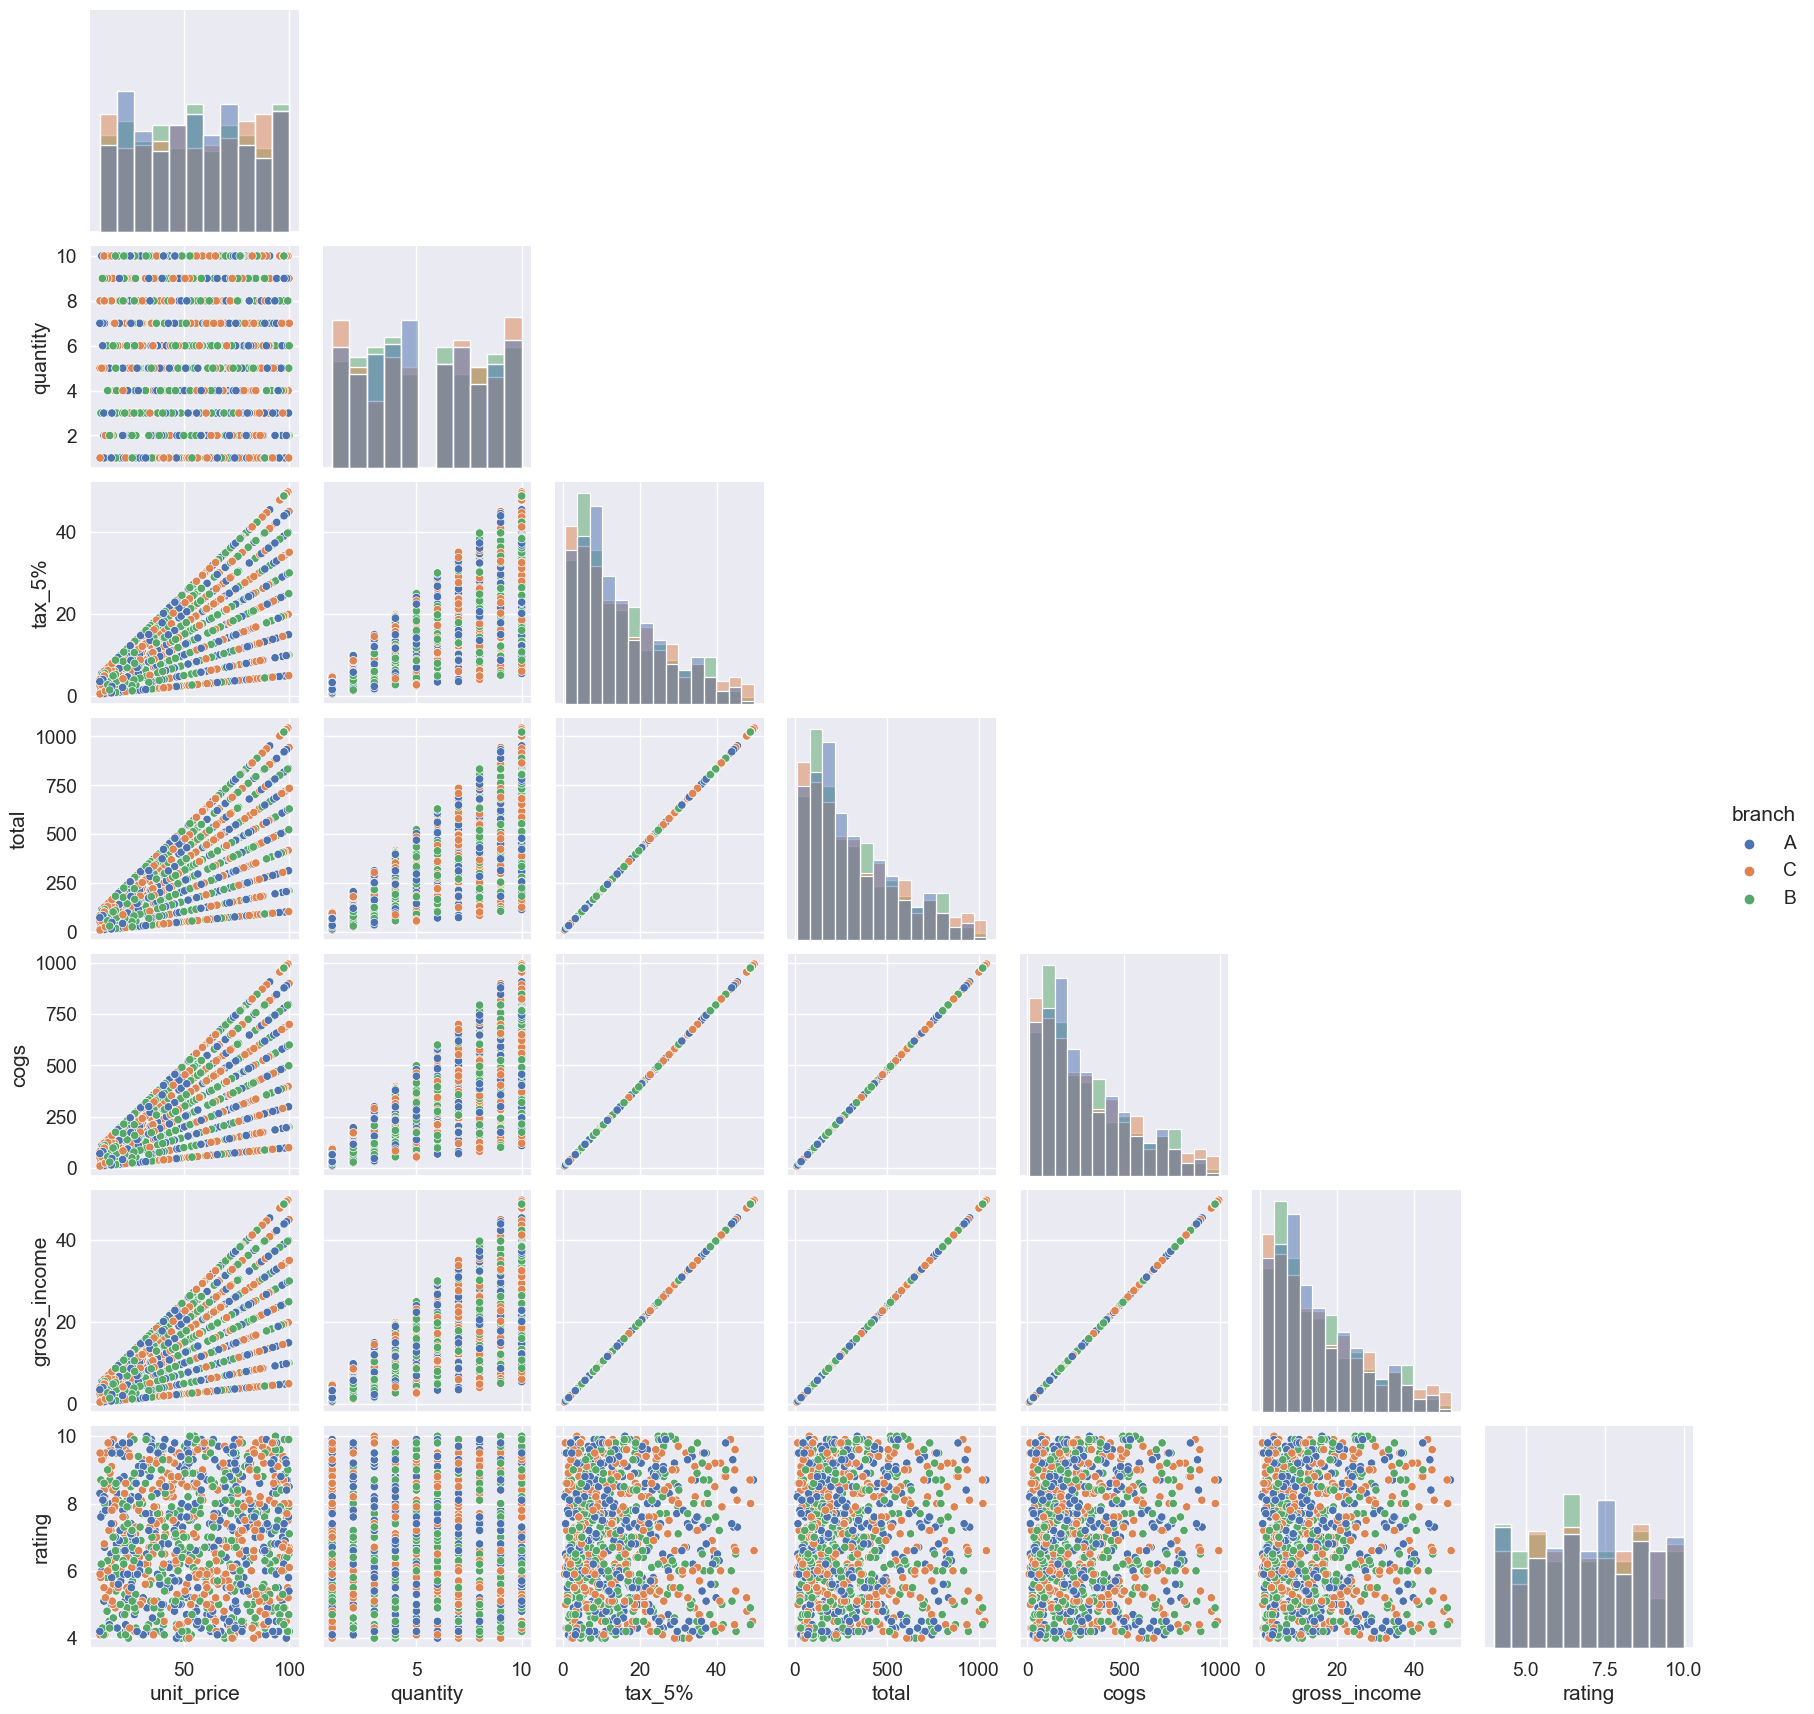

In [52]:
sns.pairplot(df, hue="branch", diag_kind="hist",corner=True)

### 💠Multivariate Analysis

#### 🔹Create a correlation matrix

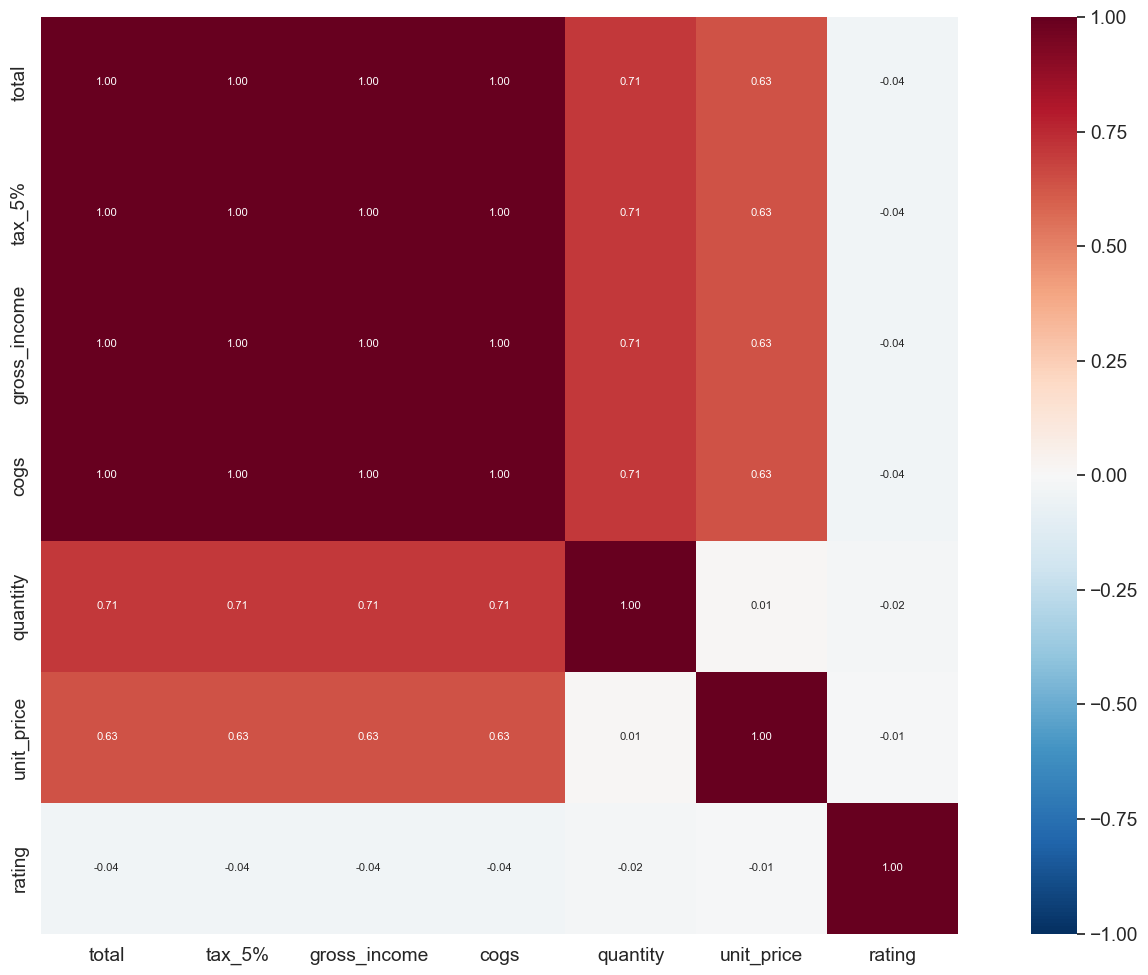

In [43]:
corr = df.corr()

columnas = corr.nlargest(len_columns , target)[target].index

plt.figure(figsize=(15, 10))
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="RdBu_r",
                 vmin=-1, vmax=1)

plt.tight_layout()
plt.show()
